# Titanic Survial Predicions via Logistic Regression Model
We will be using <a href="https://www.kaggle.com/tedllh/titanic-train">Titanic Data Set from kaggle</a>. We will classify two classes here, dead and survived people.

### Importing Libraries

In [1]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns # for data visualization

%matplotlib inline

### Fetching the data from Data set

In [9]:
train = pd.read_csv("../input/titanic-train/titanic_train.csv")

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we have the data, what's our problem? We will be using features like Name, Sex, Age, Pclass etc. To predict whether the person **Survived** or not.

Obviously we will be doing data preprocessing to see which part of data is necessary and which is not. So, we will be dropping some features that doesn't effect our prediction such as Name, PassengerID and others.

And this will be done after data visualization :)

## Exploratory Data Analysis (EDA)
Let's search for missing values!

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Note:
Whenever you are going to show this null or missing values. *Always go for **Data Visualization** here*

## Heatmap

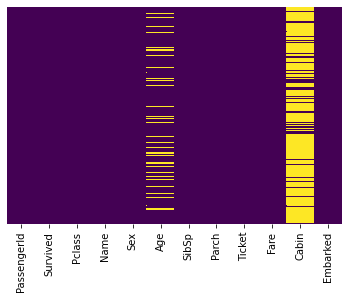

In [12]:
# using seaborn
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

## Countplot

Now, here the missing values can be visualized very clearly. Hence, this method is more proficient for presentations stuff at industry level.

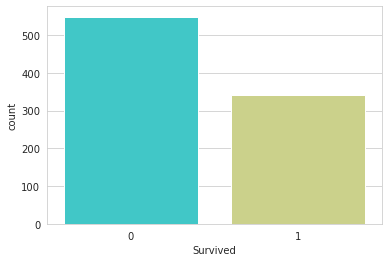

In [13]:
# countplot for death and survival rate
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = train, palette = 'rainbow')

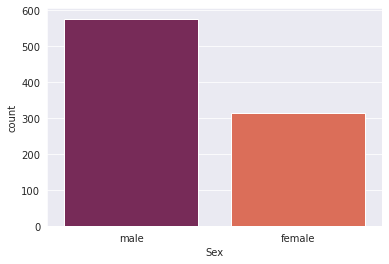

In [14]:
# countplot for male and female
sns.set_style('darkgrid')
sns.countplot(x = "Sex", data = train, palette = 'rocket')

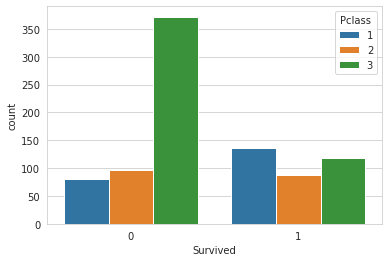

In [15]:
# countplot for people died against Pclass
sns.set_style('whitegrid')
sns.countplot(x = "Survived", hue = 'Pclass', data = train)

## Histogram

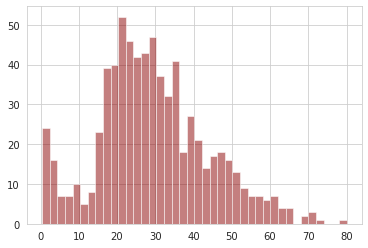

In [16]:
# getting the count of Age person
train['Age'].hist(bins=40, color='darkred', alpha=0.5)

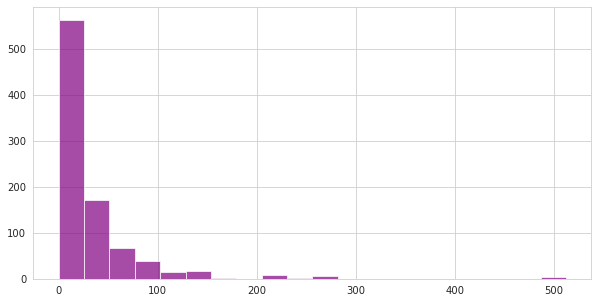

In [17]:
train['Fare'].hist(bins=20, color='purple', alpha = 0.7, figsize = (10, 5))

## Data cleaning
That is we are going to fill the missing values, as we have seen using heatmap that we cannot afford to drop those missing values as we may lost a huge amount of data.

Replacing values is known as imputation. So, we are going to impute average values.

---
Getting the average Age

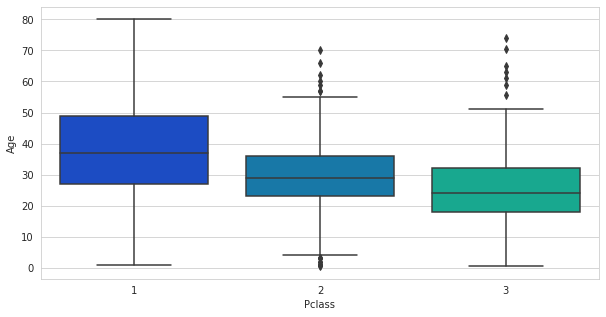

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

Let's say we have average age as:
- 1st class ==> 37
- 2nd class ==> 28
- 3rd class ==> 25

---
Now we will make a function that will replace all the null values for specific PClass with average age in that class

## Imputing Average Age

In [19]:
# making a method for imputing age
def impute_age(cols):
    # we will pass 2 cols as arguments, col at 0 index will be for age and col at 1 index will be for Pclass
    Age = cols[0]
    Pclass = cols[1]
    
    # getting null values
    if pd.isnull(Age):
        # returning avg. age (37) for 1st Class
        if Pclass == 1:
            return 37
        # for 2nd class age (28)
        elif Pclass == 2:
            return 28
        # for 3rd class age (25)
        else:
            return 25
    else:
        return Age
            

In [20]:
# applying above function
# col[0] = 'Age' & col[1] = 'Plcass'
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

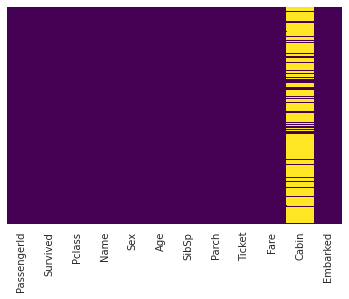

In [21]:
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

### Dropping unnecessary columns
Such that: Name, Cabin, PassengerID etc

In [22]:
# cabin
train.drop('Cabin', inplace = True, axis = 1)

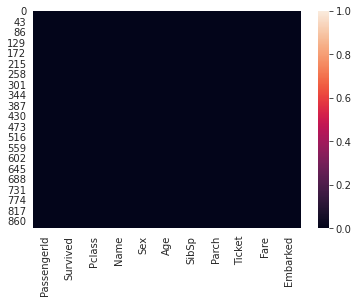

In [23]:
sns.heatmap(train.isnull())

In [24]:
train.shape # 1 column is dropped now

(891, 11)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorcial Features
As we know that ML model only works for numerical not categorical values. 

In [26]:
train.info() # 'object' are strings in python

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


---

As we have **Object(4)** so it means there are 4 string type of categorical values that needs to be converted into numercial values. But we don't need **Names** and **PassengerID** as it doesn't effect whether a person lives or die.

---


In [27]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [28]:
sex # into numerical values

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
embark # into numerical

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [30]:
# dropping extra cols
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [31]:
train # categorical values dropped here!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,25.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


## Concat Numerical Values
Now the next step is to combine or concatenate the features that we just converted from categorical to numerical.

In [32]:
train = pd.concat([train, sex, embark], axis = 1)

In [33]:
train # all values in numercial form! yay!!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


 # Building Logistic Regression Model
 ## Machine Learning Model
 As the concept is same, we will split the data into two parts i.e. Train and Test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# we required 'Survived' values on Y-Axis
Y = train['Survived'] # Y == Survived column

In [36]:
# all other features will be on X-axis. So, we are dropping 'Survived' column and storing all others
X = train.drop(['Survived'], axis=1) # X == all cols, excluding Survived column

In [37]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,25.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [38]:
# splitting Testing and Training data with 20-80 margine
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

## Training and Prediction via Model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logReg = LogisticRegression()

In [41]:
# training our Logistic Regression Model here
logReg.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [42]:
# making predictions on Testing data
predictions = logReg.predict(X_test)

## Evalutaion

In [43]:
from sklearn.metrics import classification_report

In [44]:
# using actual testing data and the predictions our Model just made
print(classification_report(Y_test, predictions)) # getting accuracy

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



## Making a .csv File of the Predictions
This file can be submitted on <a href="http://kaggle.com/">kaggle</a> or you for any other purpose where you want to show your predicitons

In [45]:
# for making a DataFrame shape must be same
pred = logReg.predict(X)

In [46]:
pred.shape

(891,)

In [47]:
X.shape # same number of Rows

(891, 9)

In [48]:
# making our own DataFrame with 'Submission' as Name
submission = pd.DataFrame({
    'PassengerId' : X['PassengerId'],
    'Survived' : pred
})

In [49]:
submission.head

<bound method NDFrame.head of      PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         1
889          890         0
890          891         0

[891 rows x 2 columns]>